# Import Libraries

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/swiggy folder/sales_prediction.csv')

In [ ]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

# Prepare Training and Test Datasets
##Need to train model and need unseen data to measure model performance
## Use :
  ### 70 % data for train 30% data for test ,seed = 42 for reproducibility
  ### Always split data right at the start if not having separate datasets

In [ ]:
x = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
SEED = 42

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=SEED)

x_train.shape,x_test.shape


((5966, 11), (2557, 11))

In [ ]:
y_test.shape,y_train.shape,x_test.shape,x_train.shape

((2557,), (5966,), (2557, 11), (5966, 11))

In [ ]:
x_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1921           FDN08         7.72          Regular         0.147904   
655            NCJ42        19.75          Low Fat         0.014301   
2229           FDY47          NaN          Regular         0.054221   
2537           FDN45        19.35          Low Fat         0.118342   
3528           FDY16        18.35          Regular         0.092150   

                  Item_Type  Item_MRP Outlet_Identifier  \
1921  Fruits and Vegetables  116.6466            OUT010   
655               Household  103.0332            OUT046   
2229                 Breads  129.1310            OUT027   
2537            Snack Foods  222.6088            OUT045   
3528           Frozen Foods  184.8266            OUT013   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
1921                       1998         NaN               Tier 3   
655                        1997       Small               Tier 1   
2229                       1985      Medium               Tier 3   
2537                       2002         NaN               Tier 2   
3528                       1987        High               Tier 3   

            Outlet_Type  
1921      Grocery Store  
655   Supermarket Type1  
2229  Supermarket Type3  
2537  Supermarket Type1  
3528  Supermarket Type1

In [ ]:
y_train.head()

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

#DATA Wrangling + EDA + Feature Engineering

In [ ]:
# Make data copy to do explorations \ modification
x_train_c= x_train.copy()

In [ ]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [ ]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
num_data = x_train_c.select_dtypes(exclude = ['object'])
num_data.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
1921         7.72         0.147904  116.6466                       1998
655         19.75         0.014301  103.0332                       1997
2229          NaN         0.054221  129.1310                       1985
2537        19.35         0.118342  222.6088                       2002
3528        18.35         0.092150  184.8266                       1987

In [ ]:
num_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4943.000000      5966.000000  5966.000000                5966.000000
mean     12.937193         0.065821   141.814242                1997.867248
std       4.630433         0.051093    62.627609                   8.385023
min       4.555000         0.000000    31.290000                1985.000000
25%       8.895000         0.026982    94.144250                1987.000000
50%      12.650000         0.053923   143.879900                1999.000000
75%      17.000000         0.094350   186.621400                2004.000000
max      21.350000         0.328391   266.888400                2009.000000

In [ ]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

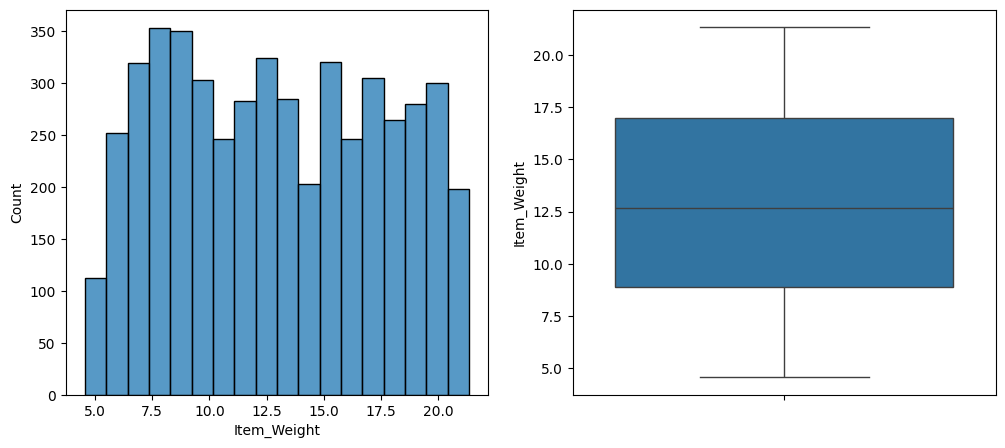

In [ ]:
fig,ax = plt.subplots(1,2 ,figsize = (12,5))
sns.histplot(data=x_train_c,x='Item_Weight',ax = ax[0]); # Updated column name
sns.boxplot(data=x_train_c,y='Item_Weight',ax = ax[1]);

In [ ]:
def visualize_numeric_feature(data_frame,col_name):
  fig,ax = plt.subplots(1,2,figsize = (12,5))
  sns.histplot(data = data_frame,x = col_name,ax = ax[0])
  sns.boxplot(data = data_frame,y = col_name,ax = ax[1])

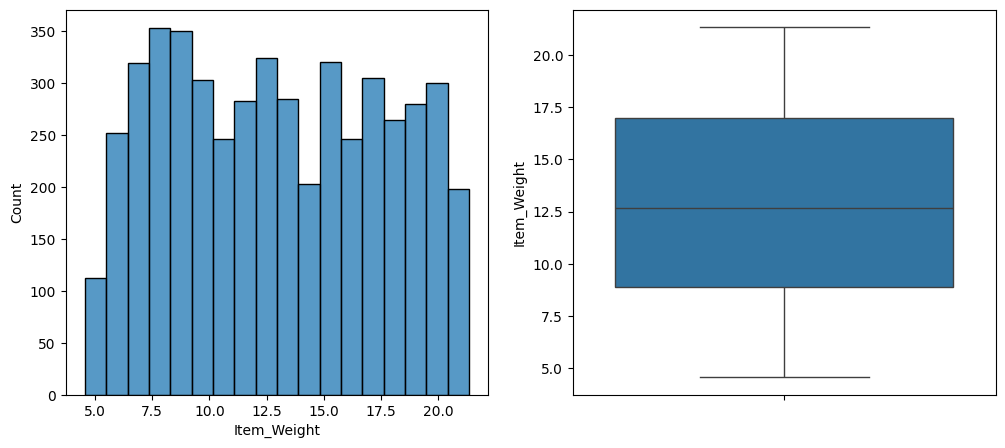

In [ ]:
visualize_numeric_feature(x_train_c,'Item_Weight')

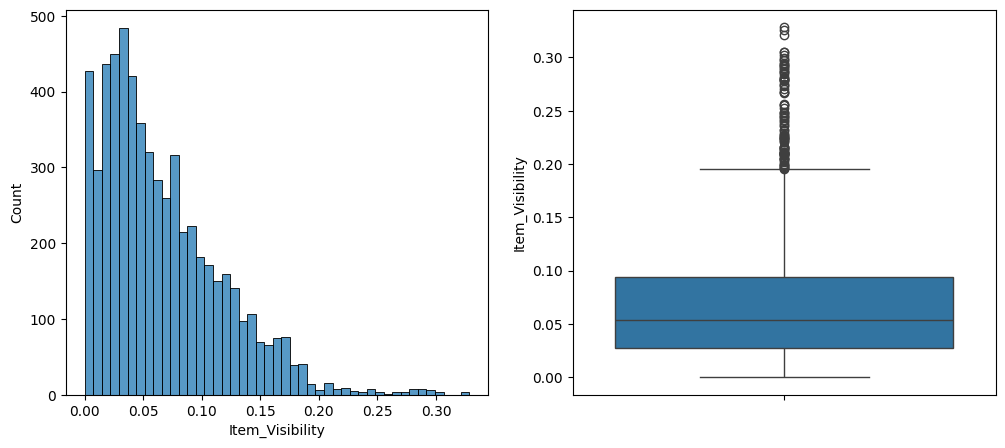

In [ ]:
visualize_numeric_feature(x_train_c,'Item_Visibility')

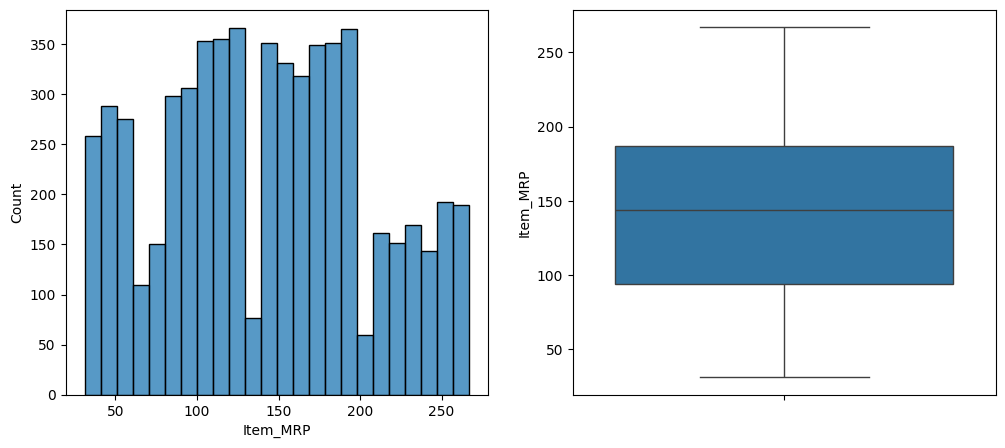

In [ ]:
visualize_numeric_feature(x_train_c,'Item_MRP')

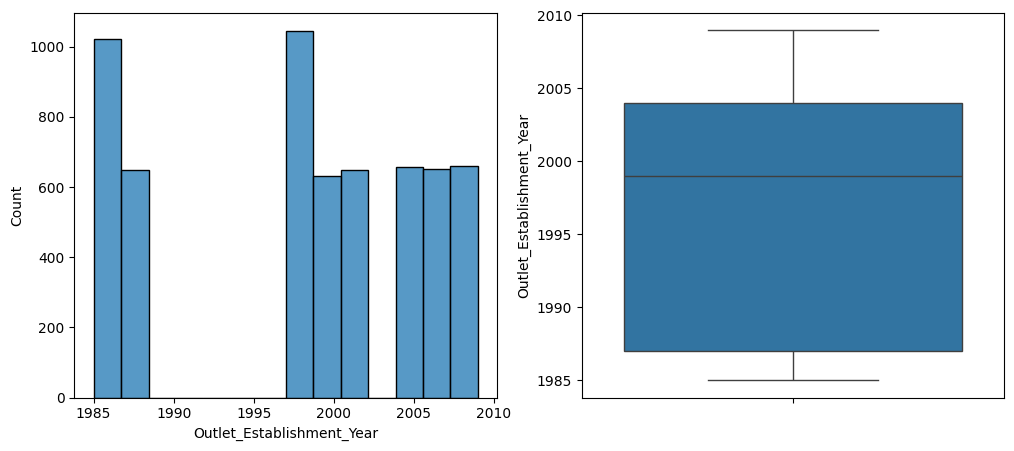

In [ ]:
visualize_numeric_feature(x_train_c,'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

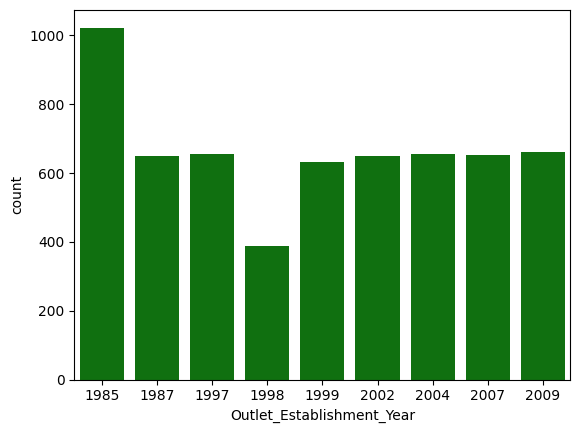

In [ ]:
sns.countplot(data = x_train_c,x = 'Outlet_Establishment_Year',color = 'green')

In [ ]:
cat_features = x_train_c.select_dtypes(include = ['object'])

In [ ]:
cat_features.head()

Item_Identifier Item_Fat_Content              Item_Type  \
1921           FDN08          Regular  Fruits and Vegetables   
655            NCJ42          Low Fat              Household   
2229           FDY47          Regular                 Breads   
2537           FDN45          Low Fat            Snack Foods   
3528           FDY16          Regular           Frozen Foods   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
1921            OUT010         NaN               Tier 3      Grocery Store  
655             OUT046       Small               Tier 1  Supermarket Type1  
2229            OUT027      Medium               Tier 3  Supermarket Type3  
2537            OUT045         NaN               Tier 2  Supermarket Type1  
3528            OUT013        High               Tier 3  Supermarket Type1

In [ ]:
cat_features.describe()

Item_Identifier Item_Fat_Content              Item_Type  \
count             5966             5966                   5966   
unique            1543                5                     16   
top              NCI54          Low Fat  Fruits and Vegetables   
freq                 9             3535                    905   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               5966        4276                 5966               5966  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 668        1960                 2367               3893

In [ ]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [ ]:
cat_features['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [ ]:
cat_features['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

# Data Wrangling + EDA

## Step 1: Create High Level Item Types

In [ ]:
x_train_c['Item_Identifier'].apply(lambda x: x[0:2]).value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [ ]:
x_train_c['Item_Identifier'].str

In [ ]:
x_train_c['Item_Identifier'].str[0:2].value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

## Step 1 : Map Item IDs to Item Types


In [ ]:
def create_item_type(data_frame):
  data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
  data_frame['Item_Type'] = data_frame['Item_Type'].map({'FD':'Food',
                                                         'NC':'Non-Consumable',
                                                         'DR':'Drinks'})
  return data_frame

In [ ]:
x_train_c = create_item_type(x_train_c)
x_train_c.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1921           FDN08         7.72          Regular         0.147904   
655            NCJ42        19.75          Low Fat         0.014301   
2229           FDY47          NaN          Regular         0.054221   
2537           FDN45        19.35          Low Fat         0.118342   
3528           FDY16        18.35          Regular         0.092150   

           Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
1921            Food  116.6466            OUT010                       1998   
655   Non-Consumable  103.0332            OUT046                       1997   
2229            Food  129.1310            OUT027                       1985   
2537            Food  222.6088            OUT045                       2002   
3528            Food  184.8266            OUT013                       1987   

     Outlet_Size Outlet_Location_Type        Outlet_Type  
1921         NaN               Tier 3      Grocery Store  
655        Small               Tier 1  Supermarket Type1  
2229      Medium               Tier 3  Supermarket Type3  
2537         NaN               Tier 2  Supermarket Type1  
3528        High               Tier 3  Supermarket Type1

### Step 2: Filling the Missing Values For Item_Weight


In [ ]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
x_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by = ['Item_Identifier'])

Item_Identifier  Item_Weight
1245           DRA12        11.60
4900           DRA24        19.35
6057           DRA59          NaN
1876           DRA59         8.27
3733           DRB01          NaN
...              ...          ...
411            NCZ42        10.50
2084           NCZ53          NaN
6879           NCZ53         9.60
7926           NCZ54        14.65
1896           NCZ54          NaN

[2401 rows x 2 columns]

In [ ]:
x_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by = ['Item_Type'])

Item_Type  Item_Weight
2796          Drinks        5.730
998           Drinks       20.250
670           Drinks        8.395
6091          Drinks       13.500
3438          Drinks       13.850
...              ...          ...
6624  Non-Consumable       12.600
6191  Non-Consumable        8.880
1911  Non-Consumable       19.850
135   Non-Consumable        7.235
6255  Non-Consumable        8.970

[641 rows x 2 columns]

# Step 2 : Fill the missing values for Item_weight
## Logic
## 1st Logic: Use mapping of Item ID - weight and fill in missing values
## 2st Logic: if Completely new Item
## i.e Item ID not in test or live data use Item Type - Median (weight) and fill in missing values ( THis is best Approch )

In [ ]:
ITEM_ID_WEIGHT_PIVOT = x_train_c.pivot_table(values='Item_Weight',index = 'Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))

In [ ]:
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT = x_train_c.pivot_table(values='Item_Weight',index = 'Item_Type',aggfunc = 'median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drinks', 11.8), ('Food', 12.8), ('Non-Consumable', 13.05)])

In [ ]:
def impute_item_weight(data_frame):
  ## 1st Logic item_id - weight
  data_frame.loc[:,'Item_Weight']= data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))

  ## 2st Logic item_type - weight if still missing
  data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

  return data_frame

In [ ]:
x_train_c = impute_item_weight(x_train_c)

In [ ]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Step 3: fill in missing values for Outlet_Size

In [ ]:
x_train_c.groupby(by= ['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode

## Step 3: impute missing values for Outlet_Size

### Logic : 1st step : Use mapping of Outlet_Type - mode(Outlet_Size) and fill in missing values
# Calculate the mode using pandas' mode function, which handles strings

OUTLET_TYPE_SIZE_PIVOT = x_train_c.pivot_table(values='Outlet_Size', index='Outlet_Type',  aggfunc=lambda x: x.mode()[0] ).reset_index()

OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [ ]:
def impute_outlet_size(data_frame):
  ## 1st Logic item_id - weight
  data_frame.loc[:,'Outlet_Size']= data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))

  return data_frame

In [ ]:
x_train_c = impute_outlet_size(x_train_c)

In [ ]:
x_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Step 4 : Standardize Item Fat_content categories

In [ ]:
x_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [ ]:
#  step 4 : make item fat content categories consistent
def standardize_item_fat_content(data_frame):
  data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace ({
      'Low Fat':'Low_Fat',
      'LF':'Low_Fat',
      'reg':'Regular',
      'Regular':'Regular',
      'low fat':'Low_Fat'
  })
  return data_frame


In [ ]:
x_train_c = standardize_item_fat_content(x_train_c)
x_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

In [ ]:
x_train_c.groupby(by = ['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-Consumable  Low_Fat             1137
dtype: int64

In [ ]:
x_train_c.loc[x_train_c['Item_Type']=='Non-Consumable','Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [ ]:
# correct item fat content for non consumables

def correct_item_fat_content(data_frame):
  data_frame.loc[data_frame['Item_Type']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
  return data_frame

In [ ]:
x_train_c = correct_item_fat_content(x_train_c)
x_train_c.groupby(by = ['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-Consumable  Non-Edible          1137
dtype: int64

In [ ]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


# Prepare dataset for ML

In [ ]:
def prepare_dataset(data_frame):

  # step 1 : create item type

  data_frame = create_item_type(data_frame)

  # step 2 : Fill in the misssing values for  item weight

  data_frame = impute_item_weight(data_frame)

  # Step 3 : Impute missing values for Outlet_size

  data_frame = impute_outlet_size(data_frame)

  # Step 4 : Make Item Fat Content categories consistent

  data_frame = standardize_item_fat_content(data_frame)

  # step 5: Correct Item fat content for non-consumables

  data_frame = correct_item_fat_content(data_frame)

  return data_frame

In [ ]:
x_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
# Now x_train_c data if fully cleaned and used to perform Machine learning algos So make x_train dataFrame also able

In [ ]:
x_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
x_train = prepare_dataset(x_train)

In [ ]:
x_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
x_test = prepare_dataset(x_test)

In [ ]:
x_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Handling Categorical Data
## EXP 1: All categorical columns- one hot Encoded

In [ ]:
cat_feats = x_train.select_dtypes(include = ['object'])

In [ ]:
cat_feats.tail()

Item_Identifier Item_Fat_Content       Item_Type Outlet_Identifier  \
5734           FDY08          Regular            Food            OUT010   
5191           FDC41          Low_Fat            Food            OUT017   
5390           NCQ53       Non-Edible  Non-Consumable            OUT045   
860            FDL46          Low_Fat            Food            OUT017   
7270           NCN30       Non-Edible  Non-Consumable            OUT046   

     Outlet_Size Outlet_Location_Type        Outlet_Type  
5734       Small               Tier 3      Grocery Store  
5191       Small               Tier 2  Supermarket Type1  
5390       Small               Tier 2  Supermarket Type1  
860        Small               Tier 2  Supermarket Type1  
7270       Small               Tier 1  Supermarket Type1

In [ ]:
cat_feats.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_feature_names = ohe.get_feature_names_out(input_features = cat_feats.columns)

In [ ]:
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [ ]:
num_feats_train = x_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
num_feats_train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
0         7.72         0.147904  116.6466                       1998
1        19.75         0.014301  103.0332                       1997
2         8.60         0.054221  129.1310                       1985
3        19.35         0.118342  222.6088                       2002
4        18.35         0.092150  184.8266                       1987

In [ ]:
cat_feats_train = x_train.select_dtypes(include = ['object'])
x_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns = ohe_feature_names)

In [ ]:
x_train_final = pd.concat([num_feats_train,x_train_cat_ohe],axis = 1)
x_train_final.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         7.72         0.147904  116.6466                       1998   
1        19.75         0.014301  103.0332                       1997   
2         8.60         0.054221  129.1310                       1985   
3        19.35         0.118342  222.6088                       2002   
4        18.35         0.092150  184.8266                       1987   

   Item_Identifier_DRA12  Item_Identifier_DRA24  Item_Identifier_DRA59  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Item_Identifier_DRB01  Item_Identifier_DRB13  Item_Identifier_DRB24  ...  \
0                    0.0                    0.0                    0.0  ...   
1                    0.0                    0.0                    0.0  ...   
2                    0.0                    0.0                    0.0  ...   
3                    0.0                    0.0                    0.0  ...   
4                    0.0                    0.0                    0.0  ...   

   Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0               0.0                 0.0                1.0   
1               0.0                 0.0                1.0   
2               0.0                 1.0                0.0   
3               0.0                 0.0                1.0   
4               1.0                 0.0                0.0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          1.0   
4                          0.0                          0.0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                          1.0                        1.0   
1                          0.0                        0.0   
2                          1.0                        0.0   
3                          0.0                        0.0   
4                          1.0                        0.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            0.0                            0.0   
1                            1.0                            0.0   
2                            0.0                            0.0   
3                            1.0                            0.0   
4                            1.0                            0.0   

   Outlet_Type_Supermarket Type3  
0                            0.0  
1                            0.0  
2                            1.0  
3                            0.0  
4                            0.0  

[5 rows x 1573 columns]

In [ ]:
final_columns = x_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [ ]:
num_feats_test = x_test.select_dtypes(exclude =['object']).reset_index(drop = True)
cat_feats_test = x_test.select_dtypes(include=['object'])
x_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(),columns = ohe_feature_names)
x_test_final = pd.concat([num_feats_test,x_test_cat_ohe],axis = 1)
x_test_final = x_test_final[final_columns]

x_test_final.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0       14.300         0.026300   79.4302                       1987   
1        7.930         0.071136   42.7086                       1997   
2       14.500         0.041313   42.0454                       1999   
3       13.000         0.044767  173.7054                       1985   
4       10.195         0.012456  197.5110                       2004   

   Item_Identifier_DRA12  Item_Identifier_DRA24  Item_Identifier_DRA59  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Item_Identifier_DRB01  Item_Identifier_DRB13  Item_Identifier_DRB24  ...  \
0                    0.0                    0.0                    0.0  ...   
1                    0.0                    0.0                    0.0  ...   
2                    0.0                    0.0                    0.0  ...   
3                    0.0                    0.0                    0.0  ...   
4                    0.0                    0.0                    0.0  ...   

   Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0               1.0                 0.0                0.0   
1               0.0                 0.0                1.0   
2               0.0                 1.0                0.0   
3               0.0                 1.0                0.0   
4               0.0                 0.0                1.0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          1.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          1.0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                          1.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          1.0                        0.0   
4                          0.0                        0.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            1.0                            0.0   
1                            1.0                            0.0   
2                            1.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   

   Outlet_Type_Supermarket Type3  
0                            0.0  
1                            0.0  
2                            0.0  
3                            1.0  
4                            0.0  

[5 rows x 1573 columns]

# Modeling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

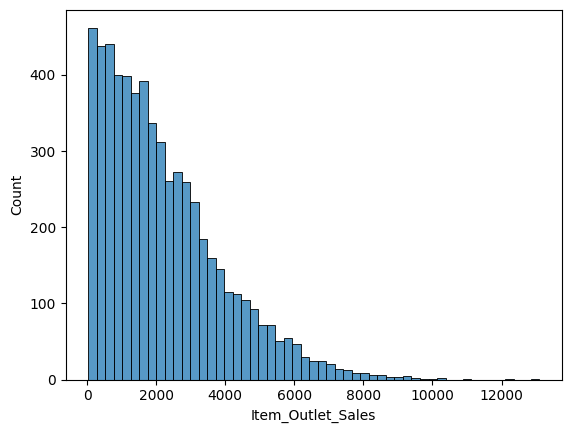

In [ ]:
import seaborn as sns
sns.histplot(data =y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor , HistGradientBoostingRegressor
import xgboost as xgb

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
def train_and_eval_model(model,x_train,y_train,cv = 5):

  cv_results = cross_validate(model,x_train,y_train,cv = cv,scoring = ('r2','neg_root_mean_squared_error'),)
  print('Model: ',model)

  r2_scores = cv_results['test_r2']

  print('R2 CV scores ',r2_scores)
  print('R2 CV scores mean / stdev :',np.mean(r2_scores),'/',np.std(r2_scores))

  rmse_scores = cv_results['test_neg_root_mean_squared_error']
  rmse_scores = [-1* score for score in rmse_scores]

  print('RMSE CV scores ',rmse_scores)
  print('RMSE CV scores mean / stdev :',np.mean(rmse_scores),'/',np.std(rmse_scores))


In [ ]:
rf = RandomForestRegressor(random_state = SEED)
train_and_eval_model(model = rf,x_train = x_train_final, y_train=y_train)

Model:  RandomForestRegressor(random_state=42)
R2 CV scores  [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
R2 CV scores mean / stdev : 0.5429242875459817 / 0.01828158855152387
RMSE CV scores  [1104.0666302663794, 1168.4808032468748, 1180.6054342042014, 1154.4334423647522, 1202.0836655939197]
RMSE CV scores mean / stdev : 1161.9339951352256 / 32.888811410647826


In [ ]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model = gb,x_train = x_train_final,y_train = y_train)

Model:  GradientBoostingRegressor(random_state=42)
R2 CV scores  [0.6065274  0.59366925 0.57356358 0.60924345 0.55022613]
R2 CV scores mean / stdev : 0.5866459646024772 / 0.022148578096336337
RMSE CV scores  [1056.8793046591481, 1082.786581771003, 1140.2068860094903, 1080.838373141466, 1163.8349579736446]
RMSE CV scores mean / stdev : 1104.9092207109504 / 40.23395923794627


In [ ]:
hgb = HistGradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model = hgb,x_train = x_train_final,y_train = y_train)

Model:  HistGradientBoostingRegressor(random_state=42)
R2 CV scores  [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean / stdev : 0.5613284973532673 / 0.0205841656268121
RMSE CV scores  [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV scores mean / stdev : 1138.235415343526 / 35.957026103361265


In [ ]:
xgr = xgb.XGBRegressor(random_state = SEED)
train_and_eval_model(model = xgr,x_train = x_train_final,y_train = y_train)

Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores  [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 CV scores mean / stdev : 0.5577825481764618 / 0.021778582707669483
RMSE CV scores  [1095.416494682338, 1127.8526118741622, 1178.792371186943, 1115.290340217991, 1196.8930768

In [ ]:
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model = lgbr,x_train = x_train_final,y_train = y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

In [ ]:
x_train.shape

(5966, 11)

In [ ]:
x_train_final.shape

(5966, 1573)

# Handling Categorical Data

## Expt 2: All Categorical columns - Native Handling  

In [ ]:
x_train_copy = x_train.copy().drop(columns='Item_Identifier')

cat_cols = x_train_copy.select_dtypes(include = ['object']).columns.tolist()
num_cols = cal_cols = x_train_copy.select_dtypes(exclude = ['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [ ]:
x_train_copy[cat_cols] = x_train_copy[cat_cols].astype('category')
n_categorical_features   = len(cat_cols)
n_numerical_features = len(num_cols)
x_train_copy = x_train_copy[cat_cols + num_cols]

x_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [ ]:
categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features
categorical_mask

[True, True, True, True, True, True, False, False, False, False]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [ ]:
categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value = np.nan),
        make_column_selector(dtype_include = 'category'),
    ),
    remainder = 'passthrough',
)

hgh  = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(random_state = SEED,
                                 categorical_features = categorical_mask),
)
train_and_eval_model(model = hgh,x_train = x_train_copy,y_train= y_train)

Model:  Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e041e162080>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                        

In [ ]:
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model = lgbr,x_train = x_train_copy,y_train = y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 10
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 10
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

# Handling Categorical Data
## expt 3 : No item Identifier - one hot encoded

In [ ]:
x_train.select_dtypes(include=['object']).drop (columns = ['Item_Identifier']).head()


Item_Fat_Content       Item_Type Outlet_Identifier Outlet_Size  \
1921          Regular            Food            OUT010       Small   
655        Non-Edible  Non-Consumable            OUT046       Small   
2229          Regular            Food            OUT027      Medium   
2537          Low_Fat            Food            OUT045       Small   
3528          Regular            Food            OUT013        High   

     Outlet_Location_Type        Outlet_Type  
1921               Tier 3      Grocery Store  
655                Tier 1  Supermarket Type1  
2229               Tier 3  Supermarket Type3  
2537               Tier 2  Supermarket Type1  
3528               Tier 3  Supermarket Type1

In [ ]:
cat_feats = x_train.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])

ohe = OneHotEncoder(handle_unknown  ='ignore')
ohe.fit(cat_feats)

ohe.fit(cat_feats)
ohe_features_names = ohe.get_feature_names_out(input_features = cat_feats.columns)

In [ ]:
num_feats_train= x_train.select_dtypes(exclude=['object']).reset_index(drop = True)
cat_feats_train = x_train.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])

x_train_final = pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns = ohe_features_names)
x_train_final = pd.concat([num_feats_train,x_train_final],axis = 1)
x_train_final.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         7.72         0.147904  116.6466                       1998   
1        19.75         0.014301  103.0332                       1997   
2         8.60         0.054221  129.1310                       1985   
3        19.35         0.118342  222.6088                       2002   
4        18.35         0.092150  184.8266                       1987   

   Item_Fat_Content_Low_Fat  Item_Fat_Content_Non-Edible  \
0                       0.0                          0.0   
1                       0.0                          1.0   
2                       0.0                          0.0   
3                       1.0                          0.0   
4                       0.0                          0.0   

   Item_Fat_Content_Regular  Item_Type_Drinks  Item_Type_Food  \
0                       1.0               0.0             1.0   
1                       0.0               0.0             0.0   
2                       1.0               0.0             1.0   
3                       0.0               0.0             1.0   
4                       1.0               0.0             1.0   

   Item_Type_Non-Consumable  ...  Outlet_Size_High  Outlet_Size_Medium  \
0                       0.0  ...               0.0                 0.0   
1                       1.0  ...               0.0                 0.0   
2                       0.0  ...               0.0                 1.0   
3                       0.0  ...               0.0                 0.0   
4                       0.0  ...               1.0                 0.0   

   Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                1.0                          0.0   
1                1.0                          1.0   
2                0.0                          0.0   
3                1.0                          0.0   
4                0.0                          0.0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          1.0   
3                          1.0                          0.0   
4                          0.0                          1.0   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                        1.0                            0.0   
1                        0.0                            1.0   
2                        0.0                            0.0   
3                        0.0                            1.0   
4                        0.0                            1.0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                            0.0                            0.0  
1                            0.0                            0.0  
2                            0.0                            1.0  
3                            0.0                            0.0  
4                            0.0                            0.0  

[5 rows x 30 columns]

In [ ]:
x_train_final.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Establishment_Year        0
Item_Fat_Content_Low_Fat         0
Item_Fat_Content_Non-Edible      0
Item_Fat_Content_Regular         0
Item_Type_Drinks                 0
Item_Type_Food                   0
Item_Type_Non-Consumable         0
Outlet_Identifier_OUT010         0
Outlet_Identifier_OUT013         0
Outlet_Identifier_OUT017         0
Outlet_Identifier_OUT018         0
Outlet_Identifier_OUT019         0
Outlet_Identifier_OUT027         0
Outlet_Identifier_OUT035         0
Outlet_Identifier_OUT045         0
Outlet_Identifier_OUT046         0
Outlet_Identifier_OUT049         0
Outlet_Size_High                 0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 1      0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
dtype: int64

In [ ]:
x_train_final.shape

(5966, 30)

In [ ]:
gb = GradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model = gb,x_train = x_train_final,y_train=y_train)

Model:  GradientBoostingRegressor(random_state=42)
R2 CV scores  [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 CV scores mean / stdev : 0.5891824563495011 / 0.01880337124010431
RMSE CV scores  [1061.9286612011877, 1094.5675808387577, 1135.1580306171122, 1069.8223327510743, 1146.040671315857]
RMSE CV scores mean / stdev : 1101.5034553447979 / 33.864902948875674


# Handling Categorical Data
## Expt 4: Item identifier - feature hased, rest categorical - one hot encoded

In [ ]:
from sklearn.feature_extraction import FeatureHasher

In [ ]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

hash_vector_size = 50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')

# Convert each string in the 'Item_Identifier' column into a list containing that string.
# This creates the necessary iterable of iterables structure.
hashed_df = pd.DataFrame(
    fh.fit_transform(x_train['Item_Identifier'].apply(lambda x: [x])).toarray(),
    columns=['H' + str(i) for i in range(hash_vector_size)]
)
hashed_df.head()

H0   H1   H2   H3   H4   H5   H6   H7   H8   H9  ...  H40  H41  H42  H43  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   H44  H45  H46  H47  H48  H49  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 50 columns]

In [ ]:
cat_feats = x_train.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])

ohe = OneHotEncoder(handle_unknown  ='ignore')
ohe.fit(cat_feats)

ohe.fit(cat_feats)
ohe_features_names = ohe.get_feature_names_out(input_features =cat_feats.columns)

In [ ]:
nums_feats_train= x_train.select_dtypes(exclude=['object']).reset_index(drop = True)
cat_feats_train = x_train.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])
x_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns = ohe_features_names)

x_train_final = pd.concat([num_feats_train,hashed_df,x_train_cat_ohe],axis = 1)
x_train_final.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year   H0  \
0         7.72         0.147904  116.6466                       1998  0.0   
1        19.75         0.014301  103.0332                       1997  0.0   
2         8.60         0.054221  129.1310                       1985  0.0   
3        19.35         0.118342  222.6088                       2002  0.0   
4        18.35         0.092150  184.8266                       1987  0.0   

    H1   H2   H3   H4   H5  ...  Outlet_Size_High  Outlet_Size_Medium  \
0  0.0  0.0  0.0  0.0  0.0  ...               0.0                 0.0   
1  0.0  0.0  0.0  0.0  0.0  ...               0.0                 0.0   
2  0.0  0.0  0.0  0.0  0.0  ...               0.0                 1.0   
3  0.0  0.0  0.0  0.0  0.0  ...               0.0                 0.0   
4  0.0  0.0  0.0  0.0  0.0  ...               1.0                 0.0   

   Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                1.0                          0.0   
1                1.0                          1.0   
2                0.0                          0.0   
3                1.0                          0.0   
4                0.0                          0.0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          1.0   
3                          1.0                          0.0   
4                          0.0                          1.0   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                        1.0                            0.0   
1                        0.0                            1.0   
2                        0.0                            0.0   
3                        0.0                            1.0   
4                        0.0                            1.0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                            0.0                            0.0  
1                            0.0                            0.0  
2                            0.0                            1.0  
3                            0.0                            0.0  
4                            0.0                            0.0  

[5 rows x 80 columns]

In [ ]:
x_train_final.shape

(5966, 80)

In [ ]:
gb = GradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model = gb,x_train = x_train_final,y_train=y_train)

Model:  GradientBoostingRegressor(random_state=42)
R2 CV scores  [0.60324351 0.58551631 0.57101679 0.61681415 0.54613805]
R2 CV scores mean / stdev : 0.5845457617560487 / 0.024698108181039926
RMSE CV scores  [1061.2804537177167, 1093.5955805535832, 1143.6066269002074, 1070.3168274550164, 1169.1121612583172]
RMSE CV scores mean / stdev : 1107.5823299769681 / 41.980663856347405


In [ ]:
xgr = xgb.XGBRegressor(random_state = SEED)
train_and_eval_model(model = xgr,x_train = x_train_final,y_train = y_train)

Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores  [0.53676464 0.48594853 0.47719171 0.53119059 0.4537317 ]
R2 CV scores mean / stdev : 0.496965433032841 / 0.03205266365570525
RMSE CV scores  [1146.7506604419434, 1217.8851239011724, 1262.4894157229014, 1183.8748256970878, 1282.617881

In [ ]:
x_test.shape

(2557, 11)

In [ ]:
# This creates the necessary iterable of iterables structure.
hashed_df = pd.DataFrame(
    fh.fit_transform(x_test['Item_Identifier'].apply(lambda x: [x])).toarray(),
    columns=['H' + str(i) for i in range(hash_vector_size)]
)
num_feats_test= x_test.select_dtypes(exclude=['object']).reset_index(drop = True)
cat_feats_test = x_test.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])

x_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(),columns = ohe_features_names)
x_test_final = pd.concat([num_feats_test,hashed_df,x_test_cat_ohe],axis = 1)
x_test_final.head()



Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year   H0  \
0       14.300         0.026300   79.4302                       1987 -1.0   
1        7.930         0.071136   42.7086                       1997  0.0   
2       14.500         0.041313   42.0454                       1999  0.0   
3       13.000         0.044767  173.7054                       1985  0.0   
4       10.195         0.012456  197.5110                       2004  0.0   

    H1   H2   H3   H4   H5  ...  Outlet_Size_High  Outlet_Size_Medium  \
0  0.0  0.0  0.0  0.0  0.0  ...               1.0                 0.0   
1  0.0  0.0  0.0  0.0  0.0  ...               0.0                 0.0   
2  0.0  0.0  0.0  0.0  0.0  ...               0.0                 1.0   
3  0.0  0.0  0.0  0.0  0.0  ...               0.0                 1.0   
4  0.0  0.0  0.0  0.0  0.0  ...               0.0                 0.0   

   Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                0.0                          0.0   
1                1.0                          1.0   
2                0.0                          1.0   
3                0.0                          0.0   
4                1.0                          0.0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          1.0   
4                          1.0                          0.0   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                        0.0                            1.0   
1                        0.0                            1.0   
2                        0.0                            1.0   
3                        0.0                            0.0   
4                        0.0                            1.0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                            0.0                            0.0  
1                            0.0                            0.0  
2                            0.0                            0.0  
3                            0.0                            1.0  
4                            0.0                            0.0  

[5 rows x 80 columns]

In [ ]:
x_test_final.shape

(2557, 80)

In [ ]:
xgr = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = SEED)
xgr.fit(x_train_final,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgr.predict(x_test_final)


In [ ]:
x_test_final.shape

(2557, 80)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
print('R2_score:',r2_score(y_test,y_pred))
print('RMSE Score :',mean_squared_error(y_test,y_pred,squared=False))

R2_score: 0.542336999238969
RMSE Score : 1132.2151309907754


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
y_pred.shape

(2557,)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

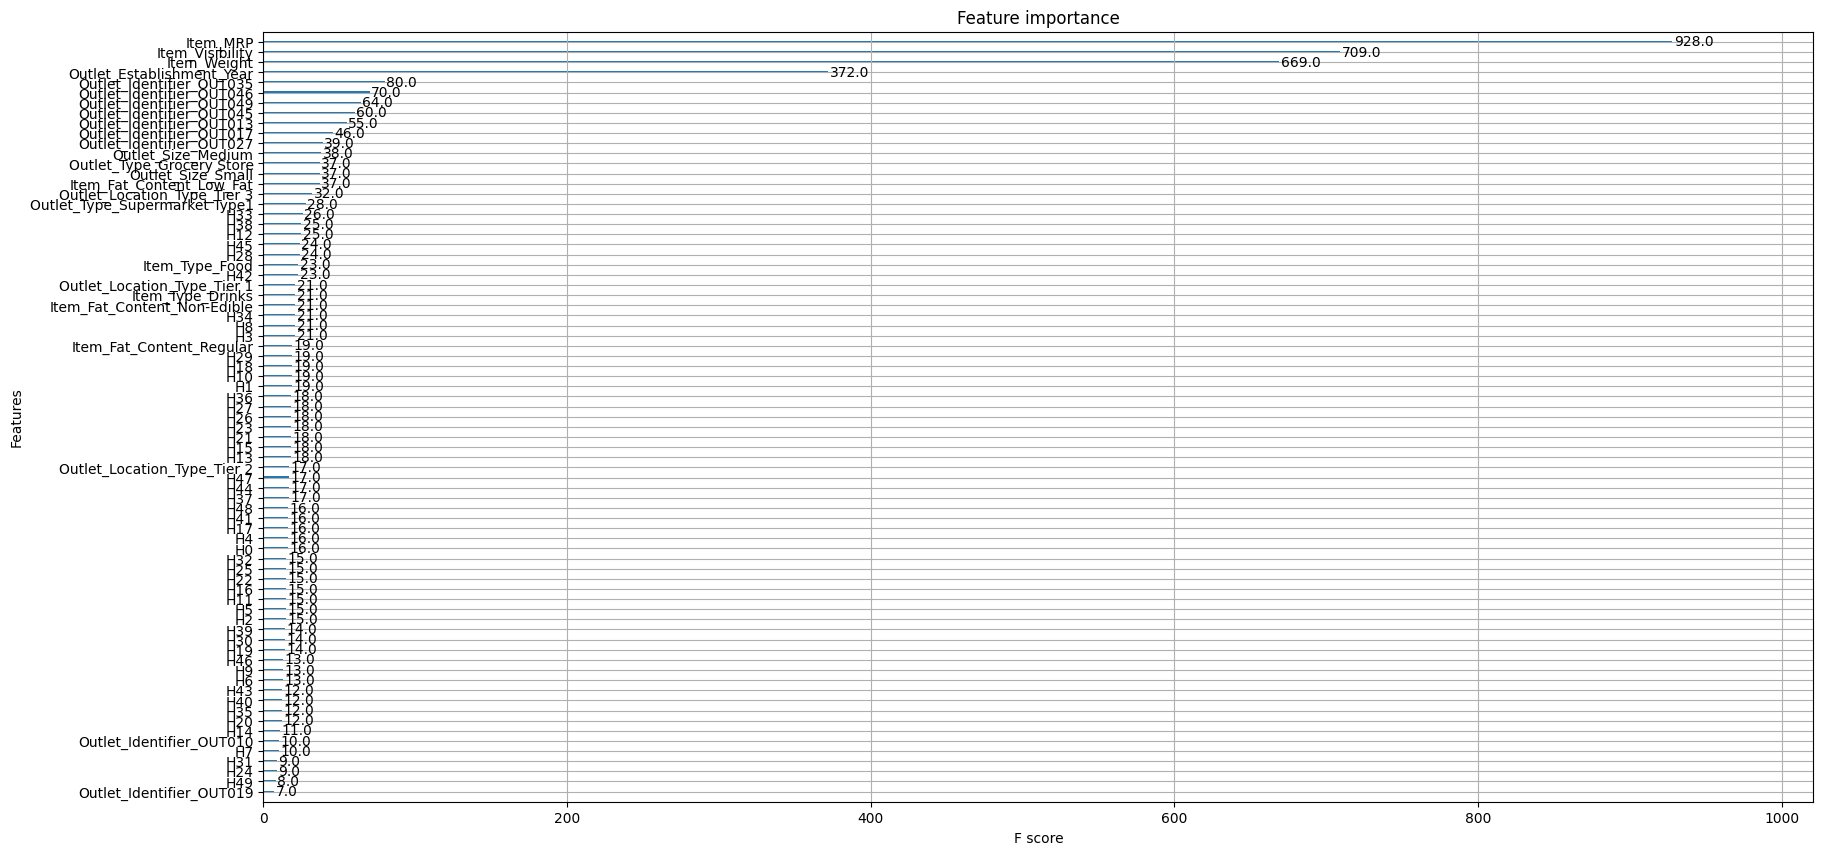

In [ ]:
from xgboost import plot_importance
fig , ax = plt.subplots(1,1,figsize = (20,10))
plot_importance(xgr,ax = ax)

In [ ]:
y_pred.shape

(2557,)

# some topic to learn
## feature hashing
## weight of evidence
## target mean encoding
## embeddings
##